### The Mind

set up a function with number of players, number of cards each

then return array of arrays with generated cards for each player, sorted low to high

e.g.

setup_game(num_players=3, num_cards=4)

returns

    [
    [1, 24, 56, 98],
    [8, 25, 29, 76],
    [36, 45, 64, 81],
    ]


In [94]:
import random

def shuffle_cards(total_cards: int):
    """Selects a sample of cards to play with."""
    return random.sample(range(1, 101), k=total_cards)

def deal_cards(dealt_cards, players: int, cards: int):
    """Splits sampled cards into lists for each player"""
    return [dealt_cards[i * cards:(i + 1) * cards] for i in range(players)]

def sort_cards(split_cards):
    split_cards_copy = split_cards.copy()
    for hand in split_cards_copy:
        hand.sort()
    return split_cards_copy

def setup_game(players: int, cards: int):
    total_cards = players * cards
    
    dealt_cards = shuffle_cards(total_cards)

    split_cards = deal_cards(dealt_cards, players, cards)

    sorted_cards = sort_cards(split_cards)

    return sorted_cards

def rank_game(split_cards):
    # Flatten all cards into one list
    all_cards = sorted(x for hand in split_cards for x in hand)

    # Create dictionary mapping card -> rank
    rank_map = {card: i + 1 for i, card in enumerate(all_cards)}

    # Replace each card with its global rank
    ranked_cards = [[rank_map[card] for card in hand] for hand in split_cards]
    return ranked_cards


def card_differences(cards):
    diffs = []
    prev = 1  # first difference is compared to 1
    for card in cards:
        diffs.append(card - prev)
        prev = card
    return diffs

def generate_diffs(players: int, cards: int):
    """Generate a diff between the sorted cards"""
    total_cards = players * cards
    shuffled = shuffle_cards(total_cards)
    sorted_cards = sorted(shuffled)
    diffs = card_differences(sorted_cards)
    return diffs

def combine_games(array):
    combined = []
    for game in array:
        combined.extend(game)
    return combined
    

In [ ]:
players = 4
cards = 5

game = setup_game(players, cards)
print(game)
for i, player_cards in enumerate(game, start=1):
    print(f"Player {i}: {player_cards}")

ranked_cards = rank_game(game)

print(f"ranked game: {ranked_cards}")

[[47, 52, 69, 83, 95], [19, 42, 72, 84, 92], [44, 51, 58, 88, 97], [14, 32, 45, 57, 99]]
Player 1: [47, 52, 69, 83, 95]
Player 2: [19, 42, 72, 84, 92]
Player 3: [44, 51, 58, 88, 97]
Player 4: [14, 32, 45, 57, 99]
ranked game: [[7, 9, 12, 14, 18], [2, 4, 13, 15, 17], [5, 8, 11, 16, 19], [1, 3, 6, 10, 20]]


In [98]:
players = 3
cards = 4
total_cards = players * cards

print(f"Num cards: {players * cards}")
print(f"Differences: {generate_diffs(players, cards)}\n")

a = [generate_diffs(players, cards) for _ in range(10)]
print(a)

combined = combine_games(a)
# combined_diffs = []

# for inner in a:
#     combined_diffs.extend(inner)

print(f"Combined: {combined}")

for game in a:
    print(game)

Num cards: 12
Differences: [1, 14, 19, 3, 20, 6, 6, 4, 6, 3, 1, 13]

[[0, 4, 7, 29, 5, 9, 3, 12, 9, 1, 7, 8], [8, 1, 5, 3, 3, 9, 12, 10, 24, 13, 2, 7], [7, 1, 6, 4, 24, 3, 2, 13, 1, 2, 1, 35], [10, 1, 20, 9, 8, 2, 2, 6, 1, 9, 29, 1], [37, 1, 5, 9, 5, 4, 1, 5, 4, 14, 2, 4], [1, 5, 7, 3, 19, 16, 5, 3, 10, 3, 9, 14], [14, 2, 9, 4, 8, 19, 1, 5, 1, 3, 9, 24], [1, 21, 5, 1, 19, 7, 3, 2, 10, 2, 3, 18], [1, 2, 2, 3, 2, 29, 18, 3, 22, 6, 8, 1], [11, 1, 16, 2, 3, 4, 1, 1, 15, 4, 5, 16]]
Combined: [0, 4, 7, 29, 5, 9, 3, 12, 9, 1, 7, 8, 8, 1, 5, 3, 3, 9, 12, 10, 24, 13, 2, 7, 7, 1, 6, 4, 24, 3, 2, 13, 1, 2, 1, 35, 10, 1, 20, 9, 8, 2, 2, 6, 1, 9, 29, 1, 37, 1, 5, 9, 5, 4, 1, 5, 4, 14, 2, 4, 1, 5, 7, 3, 19, 16, 5, 3, 10, 3, 9, 14, 14, 2, 9, 4, 8, 19, 1, 5, 1, 3, 9, 24, 1, 21, 5, 1, 19, 7, 3, 2, 10, 2, 3, 18, 1, 2, 2, 3, 2, 29, 18, 3, 22, 6, 8, 1, 11, 1, 16, 2, 3, 4, 1, 1, 15, 4, 5, 16]
[0, 4, 7, 29, 5, 9, 3, 12, 9, 1, 7, 8]
[8, 1, 5, 3, 3, 9, 12, 10, 24, 13, 2, 7]
[7, 1, 6, 4, 24, 3, 2, 13, 1, 2, 1,

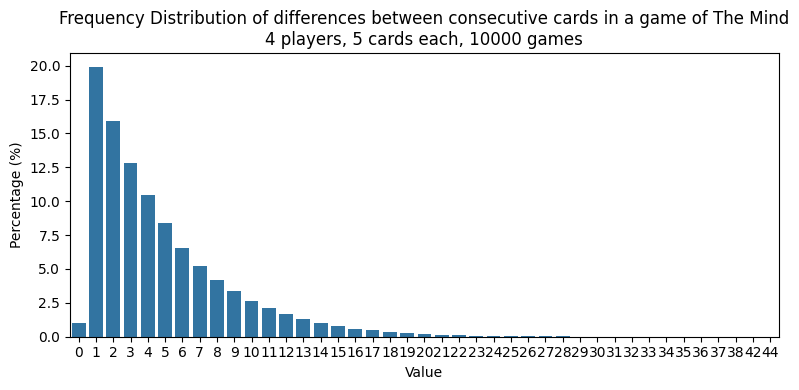

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_frequency_distribution(data, games: int, players: int, cards: int):
    plt.figure(figsize=(8, 4))

    # Count the frequency of each value
    sns.countplot(x=data, stat="percent")

    plt.title(f"Frequency Distribution of differences between consecutive cards in a game of The Mind\n{players} players, {cards} cards each, {games} games")
    plt.xlabel("Value")
    plt.ylabel("Percentage (%)")
    plt.tight_layout()
    plt.show()

players = 4
cards = 5
games = 10000
# Example usage:
diffs = [generate_diffs(players, cards) for _ in range(games)]
data = combine_games(diffs)
plot_frequency_distribution(data, games, players, cards)


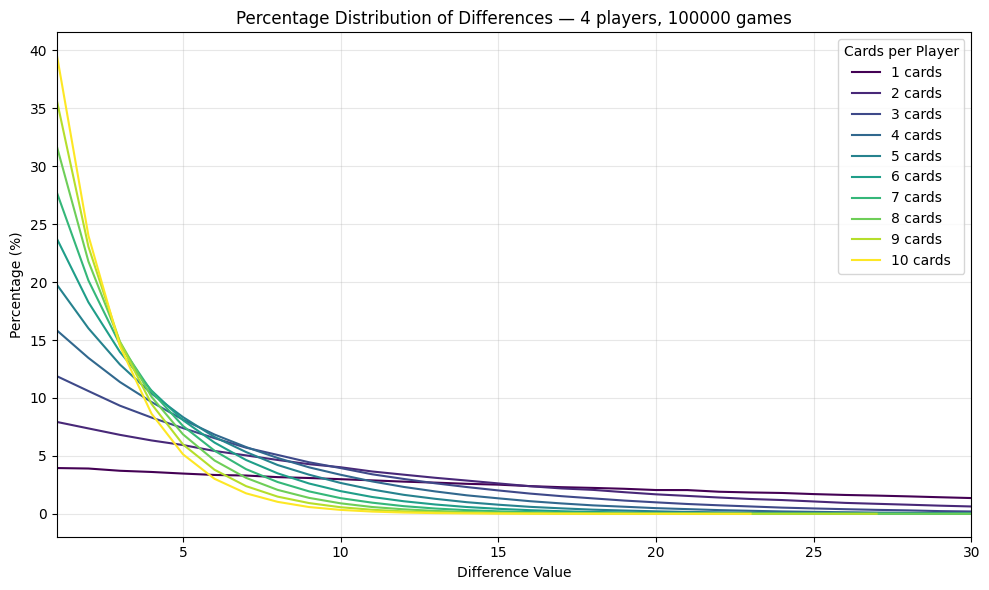

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

def get_percentage_distribution(data):
    total = len(data)
    counts = Counter(data)
    max_val = max(counts.keys())
    percentages = {i: (counts.get(i, 0) / total) * 100 for i in range(max_val + 1)}
    return percentages


def plot_percentage_lines(players: int, max_cards: int, games: int):
    plt.figure(figsize=(10, 6))

    # Create a color spectrum with one entry per card count
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, max_cards))

    for idx, cards in enumerate(range(1, max_cards + 1)):
        diffs = [generate_diffs(players, cards) for _ in range(games)]
        data = combine_games(diffs)

        percentages = get_percentage_distribution(data)
        df = pd.DataFrame({
            "difference": list(percentages.keys()),
            "percentage": list(percentages.values()),
            "cards": [cards] * len(percentages)
        })

        sns.lineplot(
            data=df,
            x="difference",
            y="percentage",
            label=f"{cards} cards",
            color=colors[idx]
        )

    plt.title(f"Percentage Distribution of Differences — {players} players, {games} games")
    plt.xlabel("Difference Value")
    plt.ylabel("Percentage (%)")
    plt.legend(title="Cards per Player")
    plt.grid(True, alpha=0.3)
    plt.xlim(1, 30)
    plt.tight_layout()
    plt.show()


plot_percentage_lines(players=4, max_cards=10, games=100000)


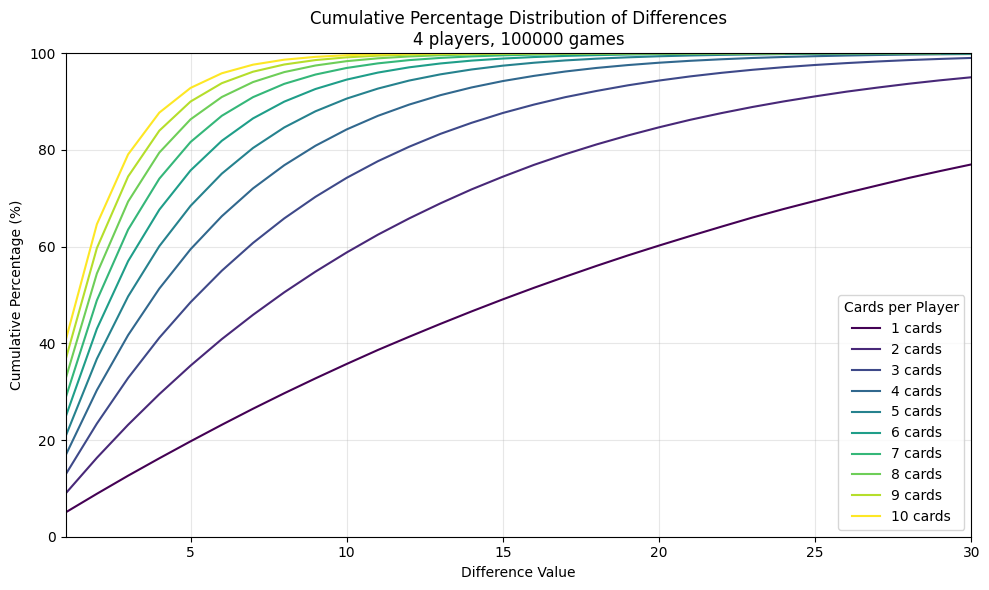

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

def get_percentage_distribution(data):
    total = len(data)
    counts = Counter(data)
    max_val = max(counts.keys())
    percentages = {i: (counts.get(i, 0) / total) * 100 for i in range(max_val + 1)}
    return percentages


def plot_cumulative_percentage_lines(players: int, max_cards: int, games: int):
    plt.figure(figsize=(10, 6))

    # Color spectrum
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, max_cards))

    for idx, cards in enumerate(range(1, max_cards + 1)):
        diffs = [generate_diffs(players, cards) for _ in range(games)]
        data = combine_games(diffs)

        percentages = get_percentage_distribution(data)

        # Convert to cumulative distribution
        cumulative_values = np.cumsum(list(percentages.values()))

        df = pd.DataFrame({
            "difference": list(percentages.keys()),
            "cumulative_percentage": cumulative_values,
            "cards": [cards] * len(percentages)
        })

        sns.lineplot(
            data=df,
            x="difference",
            y="cumulative_percentage",
            label=f"{cards} cards",
            color=colors[idx]
        )

    plt.title(f"Cumulative Percentage Distribution of Differences\n{players} players, {games} games")
    plt.xlabel("Difference Value")
    plt.ylabel("Cumulative Percentage (%)")
    plt.legend(title="Cards per Player")
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 100)
    plt.xlim(1, 30)
    plt.tight_layout()
    plt.show()


# Run it ✅
plot_cumulative_percentage_lines(players=4, max_cards=10, games=100000)
